In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import clear_output
from time import time

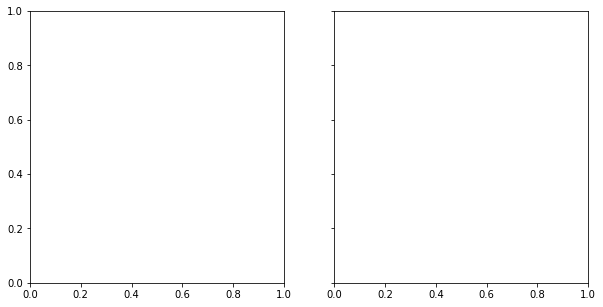

In [128]:
hash = pd.read_csv('mnist.csv')
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
def update(frame):
    axs[0].cla()
    axs[1].cla()

    end = (frame*divider) + start
    
    d_loss1 = hash.d_loss1[start:end]
    d_loss2 = hash.d_loss2[start:end]
    g_loss = hash.g_loss[start:end]

    axs[0].plot(d_loss1, label='D-Real', linestyle='-', linewidth=1)
    axs[0].legend()
    
    axs[1].plot(d_loss2, label='D-Fake', linestyle='-', linewidth=1)
    axs[1].plot(g_loss, label='Generator')
    axs[1].legend()
    # if frame+1 % 100 == 0:
    print(f'[{frame+1}/{num_frames}]')
    clear_output(wait=True)

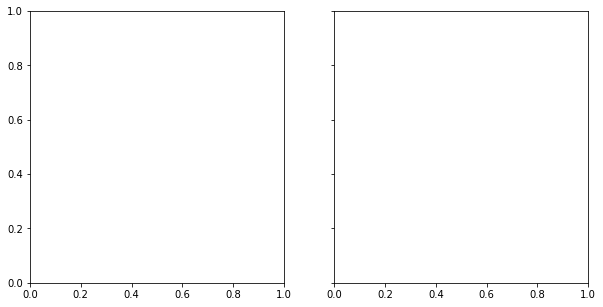

In [198]:
hash = pd.read_csv('mnist.csv')
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
FONTSIZE = 20
def update(frame):
    axs[0].cla()
    axs[1].cla()
    
    # end = (frame*divider) + start
    
    d_loss1 = hash.d_loss1[frame:frame+100]
    d_loss2 = hash.d_loss2[frame:frame+100]
    g_loss = hash.g_loss[frame:frame+100]

    axs[0].plot(d_loss1, label='D-Real', linestyle='-')
    axs[0].plot(d_loss2, label='D-Fake', linestyle='--')
    axs[0].set_title('Discriminator Classification', fontsize=FONTSIZE-5)
    axs[0].tick_params(axis='both', which='major', labelsize=FONTSIZE-7)
    axs[0].tick_params(axis='both', which='minor', labelsize=FONTSIZE-7)
    axs[0].legend(loc='upper right', fontsize=FONTSIZE-5)
    
    axs[1].plot(g_loss, label='G-Data', linestyle='-')
    axs[1].set_title('Generator Model', fontsize=FONTSIZE-5)
    axs[1].tick_params(axis='both', which='major', labelsize=FONTSIZE-7)
    axs[1].tick_params(axis='both', which='minor', labelsize=FONTSIZE-7)
    axs[1].legend(loc='upper right', fontsize=FONTSIZE-5)

    fig.suptitle('cGAN Loss Values (MNIST)', fontsize=FONTSIZE)
    fig.tight_layout()
    print(f'[{frame+1}/{num_frames}]')
    clear_output(wait=False)

In [200]:
start_time = time()
start = 5000
divider = 30
interval = 1

num_frames = (len(hash) // divider)

fps = 60
# fps = 1000 / (num_frames * interval)

anim = animation.FuncAnimation(fig, update, frames=num_frames, interval=interval)
writer = animation.FFMpegWriter(fps=fps)
anim.save('mnist-loss-animation.gif', writer=writer)
end_time = time()

print(end_time-start_time)

104.04023504257202


# 